# Analysis of Caffeine Levels in Coffee Images

### Imports

In [29]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image


### Function to Calculate Image Darkness

In [30]:
# Using opencv
def calculate_image_darkness_opencv(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Calculate the average pixel intensity
    average_intensity = np.mean(img)

    return average_intensity

# Using PIL
def calculate_image_darkness_pil(image_path):
    # Load the image and convert to grayscale
    img = Image.open(image_path).convert('L')

    # Convert the image into np array
    img_array = np.array(img)

    # Calculate the average pixel intensity
    average_intensity = np.mean(img_array)

    return average_intensity

In [31]:
# Using opencv
def calculate_image_intensity_opencv(image_path):
    # Load the image
    img = cv2.imread(image_path)
    
    # Split the image into its color channels
    b, g, r = cv2.split(img)
    
    # Calculate the average intensity for each channel
    avg_b = np.mean(b)
    avg_g = np.mean(g)
    avg_r = np.mean(r)
    
    # Combine the channel intensities
    # Simple average of the three channels
    overall_intensity = (avg_b + avg_g + avg_r) / 3
    
    return overall_intensity

# Using PIL
def calculate_image_intensity_pil(image_path):
    # Load the image
    img = Image.open(image_path)
    
    # Convert image to RGB if not already
    img = img.convert('RGB')
    
    # Convert image to numpy array
    img_array = np.array(img)
    
    # Split the image into its color channels
    r, g, b = img_array[:,:,0], img_array[:,:,1], img_array[:,:,2]
    
    # Calculate the average intensity for each channel
    avg_r = np.mean(r)
    avg_g = np.mean(g)
    avg_b = np.mean(b)
    
    # Combine the channel intensities
    # Simple average of the three channels
    overall_intensity = (avg_r + avg_g + avg_b) / 3
    
    return overall_intensity

#### Function to display image

In [32]:
def display_image(image_path):
    img = Image.open(image_path)
    img_gray = img.convert('L')
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(img)
    
    plt.subplot(1, 2, 2)
    plt.title('Grayscale Image')
    plt.imshow(img_gray, cmap='gray')
    
    plt.show()

#### Testing Calcuation on One image

Value of grayscasle: 151.20031261841606
Value of colored: 149.5904319818113
Value of grayscasle: 167.92789797750888
Value of colored: 165.50859808155528


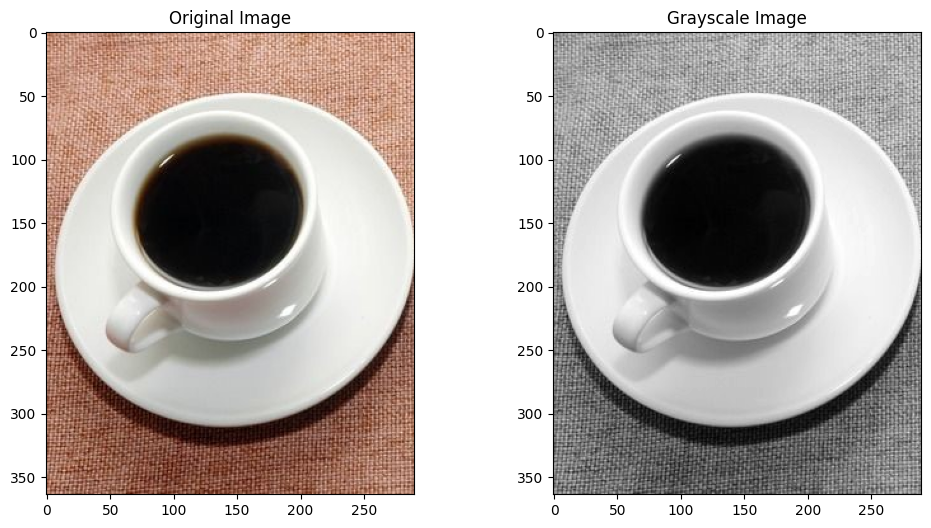

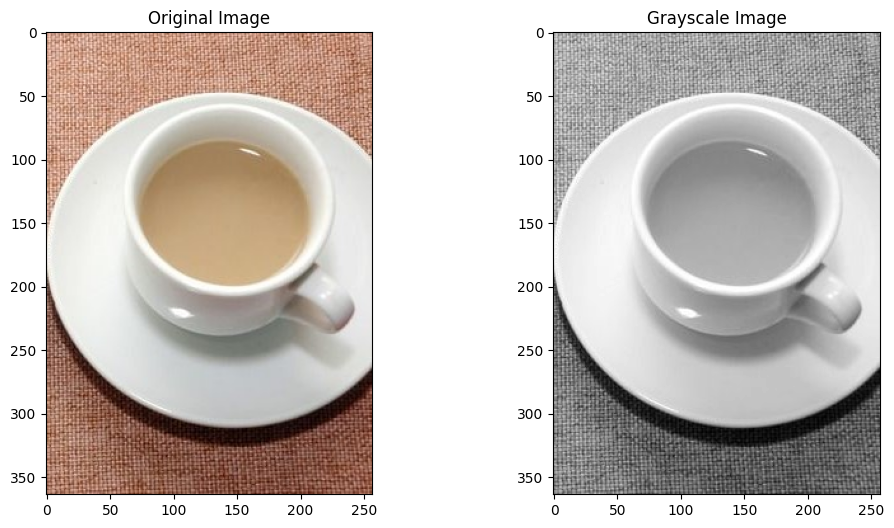

In [36]:
path = '../images/coffee1.jpg'
path1 = '../images/coffee2.jpg'

val1 = calculate_image_darkness_opencv(path)
val2 = calculate_image_intensity_opencv(path)
print(f"Value of grayscasle: {val1}")
print(f"Value of colored: {val2}")

val3 = calculate_image_darkness_pil(path1)
val4 = calculate_image_intensity_pil(path1)
print(f"Value of grayscasle: {val3}")
print(f"Value of colored: {val4}")

display_image(path)
display_image(path1)